<a href="https://colab.research.google.com/github/Sandesh02/Hacktoberfest_ML_Projects/blob/main/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)


60000

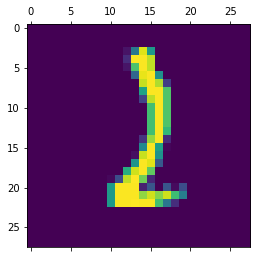

In [5]:
plt.matshow(X_train[180])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
#normalizing
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

In [8]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [11]:
y_train.shape

(60000, 10)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 

In [14]:
model=Sequential()
# CNN
model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [ ]:
#model= keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [ ]:
#tb_callback=tf.keras.callbacks.TensorBoard

In [ ]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=5)

In [15]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.1379 - accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0444 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9943


In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9907


[0.03540777415037155, 0.9907000064849854]

In [18]:
loss , accuracy = model.evaluate(X_test,y_test)
print("Test set accuracy of dataset = %f  ;  loss = %f" % (accuracy, loss))

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9907
Test set accuracy of dataset = 0.990700  ;  loss = 0.035408
